In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Load the data

In [37]:
file_path = "../data/raw/Customer_Churn_Data_Large.xlsx"
xls = pd.ExcelFile(file_path)

xls.sheet_names


['Customer_Demographics',
 'Transaction_History',
 'Customer_Service',
 'Online_Activity',
 'Churn_Status']

In [38]:
customer_demo = pd.read_excel(xls, sheet_name="Customer_Demographics")
transactions = pd.read_excel(xls, sheet_name="Transaction_History")
customer_service = pd.read_excel(xls, sheet_name="Customer_Service")
online_activity = pd.read_excel(xls, sheet_name="Online_Activity")
churn = pd.read_excel(xls, sheet_name="Churn_Status")


In [39]:
print("Customer Demographics:", customer_demo.shape)
print("Transactions:", transactions.shape)
print("Customer Service:", customer_service.shape)
print("Online Activity:", online_activity.shape)
print("Churn:", churn.shape)

customer_demo.head()


Customer Demographics: (1000, 5)
Transactions: (5054, 5)
Customer Service: (1002, 5)
Online Activity: (1000, 4)
Churn: (1000, 2)


,CustomerID,Age,Gender,MaritalStatus,IncomeLevel
0,1,62,M,Single,Low
1,2,65,M,Married,Low
2,3,18,M,Single,Low
3,4,21,M,Widowed,Low
4,5,21,M,Divorced,Medium


## Descriptive Statistics


In [40]:

tables = {
    "Customer_Demographics": customer_demo,
    "Transaction_History": transactions,
    "Customer_Service": customer_service,
    "Online_Activity": online_activity,
    "Churn_Status": churn,
}

# 1) Quick overview: rows/cols + dtypes
print("=== Table Overview (rows, cols) ===")
for name, df_ in tables.items():
    print(f"{name:22s} {df_.shape}")

print("\n=== Data Types ===")
for name, df_ in tables.items():
    print(f"\n{name}")
    display(df_.dtypes)

# 2) Missing values summary (counts + %)
print("\n=== Missing Values Summary ===")
for name, df_ in tables.items():
    miss_cnt = df_.isna().sum()
    miss_cnt = miss_cnt[miss_cnt > 0].sort_values(ascending=False)

    print(f"\n{name}")
    if miss_cnt.empty:
        print("No missing values detected.")
    else:
        miss_pct = (miss_cnt / len(df_)).round(4)
        missing_summary = pd.DataFrame({"missing_count": miss_cnt, "missing_pct": miss_pct})
        display(missing_summary)

# 3) Numerical descriptive stats: mean/median/std/min/max/range
def numeric_describe(df_: pd.DataFrame) -> pd.DataFrame:
    num = df_.select_dtypes(include=[np.number])
    if num.empty:
        return pd.DataFrame()

    out = pd.DataFrame({
        "mean": num.mean(numeric_only=True),
        "median": num.median(numeric_only=True),
        "std": num.std(numeric_only=True),
        "variance": num.var(numeric_only=True),
        "min": num.min(numeric_only=True),
        "max": num.max(numeric_only=True),
    })
    out["range"] = out["max"] - out["min"]
    return out

print("\n=== Descriptive Statistics: Numerical Columns ===")
for name, df_ in tables.items():
    stats = numeric_describe(df_)
    print(f"\n{name}")
    if stats.empty:
        print("No numeric columns found.")
    else:
        display(stats)

# 4) Categorical distributions (top categories)
def top_categories(df_: pd.DataFrame, col: str, n: int = 10) -> pd.DataFrame:
    vc = df_[col].astype("object").value_counts(dropna=False).head(n)
    out = vc.reset_index()
    out.columns = [col, "count"]
    out["proportion"] = (out["count"] / len(df_)).round(4)
    return out

print("\n=== Categorical Distributions (Top 10 per column) ===")
for name, df_ in tables.items():
    cat_cols = df_.select_dtypes(include=["object"]).columns.tolist()
    if not cat_cols:
        continue

    print(f"\n{name} | Categorical columns: {cat_cols}")
    for col in cat_cols:
        display(top_categories(df_, col, n=10))

# 5) Target overview: churn distribution + churn rate
print("\n=== Churn Distribution ===")
display(churn["ChurnStatus"].value_counts(dropna=False).rename("count"))
display(churn["ChurnStatus"].value_counts(normalize=True, dropna=False).rename("proportion"))


=== Table Overview (rows, cols) ===
Customer_Demographics  (1000, 5)
Transaction_History    (5054, 5)
Customer_Service       (1002, 5)
Online_Activity        (1000, 4)
Churn_Status           (1000, 2)

=== Data Types ===

Customer_Demographics


CustomerID       int64
Age              int64
Gender             str
MaritalStatus      str
IncomeLevel        str
dtype: object


Transaction_History


CustomerID                  int64
TransactionID               int64
TransactionDate    datetime64[us]
AmountSpent               float64
ProductCategory               str
dtype: object


Customer_Service


CustomerID                   int64
InteractionID                int64
InteractionDate     datetime64[us]
InteractionType                str
ResolutionStatus               str
dtype: object


Online_Activity


CustomerID                 int64
LastLoginDate     datetime64[us]
LoginFrequency             int64
ServiceUsage                 str
dtype: object


Churn_Status


CustomerID     int64
ChurnStatus    int64
dtype: object


=== Missing Values Summary ===

Customer_Demographics
No missing values detected.

Transaction_History
No missing values detected.

Customer_Service
No missing values detected.

Online_Activity
No missing values detected.

Churn_Status
No missing values detected.

=== Descriptive Statistics: Numerical Columns ===

Customer_Demographics


,mean,median,std,variance,min,max,range
CustomerID,500.500,500.5,288.819436,83416.666667,1,1000,999
Age,43.267,43.0,15.242311,232.328039,18,69,51



Transaction_History


,mean,median,std,variance,min,max,range
CustomerID,501.424218,506.000,285.172780,8.132351e+04,1.00,1000.00,999.00
TransactionID,5510.538979,5530.000,2582.088012,6.667179e+06,1000.00,9997.00,8997.00
AmountSpent,250.707351,250.525,142.250838,2.023530e+04,5.18,499.86,494.68



Customer_Service


,mean,median,std,variance,min,max,range
CustomerID,485.209581,474.5,287.030259,8.238637e+04,1,995,994
InteractionID,5952.887226,5911.5,2305.819681,5.316804e+06,2015,9997,7982



Online_Activity


,mean,median,std,variance,min,max,range
CustomerID,500.500,500.5,288.819436,83416.666667,1,1000,999
LoginFrequency,25.912,27.0,14.055953,197.569826,1,49,48



Churn_Status


,mean,median,std,variance,min,max,range
CustomerID,500.500,500.5,288.819436,83416.666667,1,1000,999
ChurnStatus,0.204,0.0,0.403171,0.162547,0,1,1



=== Categorical Distributions (Top 10 per column) ===

Customer_Demographics | Categorical columns: ['Gender', 'MaritalStatus', 'IncomeLevel']


/tmp/ipykernel_2243/3076882695.py:69: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = df_.select_dtypes(include=["object"]).columns.tolist()


,Gender,count,proportion
0,F,513,0.513
1,M,487,0.487


,MaritalStatus,count,proportion
0,Widowed,276,0.276
1,Married,261,0.261
2,Divorced,248,0.248
3,Single,215,0.215


,IncomeLevel,count,proportion
0,High,349,0.349
1,Medium,326,0.326
2,Low,325,0.325



Transaction_History | Categorical columns: ['ProductCategory']


/tmp/ipykernel_2243/3076882695.py:69: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = df_.select_dtypes(include=["object"]).columns.tolist()


,ProductCategory,count,proportion
0,Books,1041,0.2060
1,Groceries,1020,0.2018
2,Electronics,1001,0.1981
3,Clothing,1000,0.1979
4,Furniture,992,0.1963



Customer_Service | Categorical columns: ['InteractionType', 'ResolutionStatus']


/tmp/ipykernel_2243/3076882695.py:69: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = df_.select_dtypes(include=["object"]).columns.tolist()


,InteractionType,count,proportion
0,Feedback,360,0.3593
1,Complaint,335,0.3343
2,Inquiry,307,0.3064


,ResolutionStatus,count,proportion
0,Resolved,523,0.522
1,Unresolved,479,0.478



Online_Activity | Categorical columns: ['ServiceUsage']


/tmp/ipykernel_2243/3076882695.py:69: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = df_.select_dtypes(include=["object"]).columns.tolist()


,ServiceUsage,count,proportion
0,Online Banking,349,0.349
1,Mobile App,342,0.342
2,Website,309,0.309



=== Churn Distribution ===


ChurnStatus
0    796
1    204
Name: count, dtype: int64

ChurnStatus
0    0.796
1    0.204
Name: proportion, dtype: float64

## Establish the churn baseline

In [41]:
# merge churn with customers
df = customer_demo.merge(churn, on="CustomerID", how="left")


In [42]:
# churn distribution
df["ChurnStatus"].value_counts()


ChurnStatus
0    796
1    204
Name: count, dtype: int64

In [43]:
# churn rate
df["ChurnStatus"].value_counts(normalize=True)


ChurnStatus
0    0.796
1    0.204
Name: proportion, dtype: float64

### Next EDA step: Who is churning? (Demographics)

#### Churn by age

In [44]:
# create age groups
df["AgeGroup"] = pd.cut(
    df["Age"],
    bins=[0, 25, 35, 45, 55, 65, 100],
    labels=["<25", "25–34", "35–44", "45–54", "55–64", "65+"]
)


In [45]:
# churn rate by age group
age_churn = (
    df.groupby("AgeGroup")["ChurnStatus"]
    .mean()
    .reset_index()
    .sort_values("ChurnStatus", ascending=False)
)

age_churn


,AgeGroup,ChurnStatus
2,35–44,0.255208
4,55–64,0.235955
5,65+,0.214286
1,25–34,0.195531
0,<25,0.163743
3,45–54,0.163265


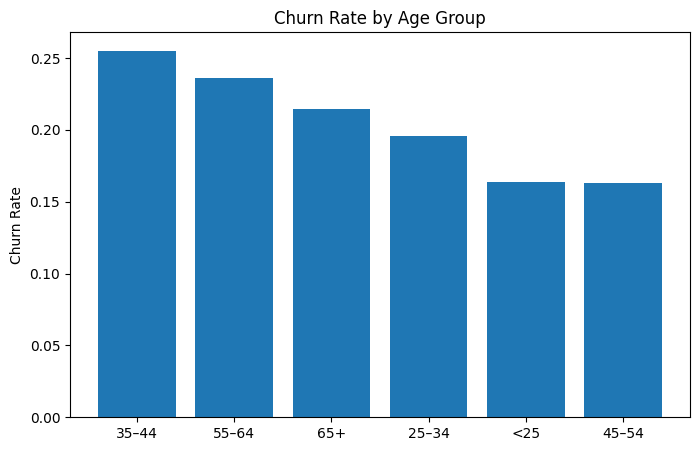

In [46]:
# visualise churn rate by age group
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(age_churn["AgeGroup"], age_churn["ChurnStatus"])
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Age Group")
plt.show()


### Next EDA dimension: Digital engagement vs churn

In [47]:
# merge online activity
df = df.merge(online_activity, on="CustomerID", how="left")


In [48]:
# churn vs login frequency
df.groupby("ChurnStatus")["LoginFrequency"].mean()


ChurnStatus
0    26.492462
1    23.647059
Name: LoginFrequency, dtype: float64

<Figure size 800x500 with 0 Axes>

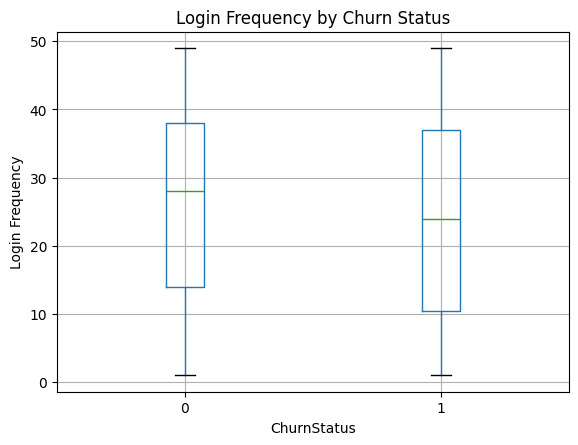

In [49]:
# visualise churn vs login frequency
plt.figure(figsize=(8,5))
df.boxplot(column="LoginFrequency", by="ChurnStatus")
plt.title("Login Frequency by Churn Status")
plt.suptitle("")
plt.ylabel("Login Frequency")
plt.show()


### Next EDA dimension: Customer service friction

In [50]:
# aggregate customer service data
cs_agg = (
    customer_service
    .groupby("CustomerID")
    .agg(
        total_interactions=("InteractionID", "count"),
        unresolved_count=("ResolutionStatus", lambda x: (x == "Unresolved").sum())
    )
    .reset_index()
)


In [51]:
# merge into dataframe
df = df.merge(cs_agg, on="CustomerID", how="left")
df[["total_interactions", "unresolved_count"]] = df[
    ["total_interactions", "unresolved_count"]
].fillna(0)


In [52]:
# compare churn vs unresolved issues
df.groupby("ChurnStatus")["unresolved_count"].mean()


ChurnStatus
0    0.477387
1    0.485294
Name: unresolved_count, dtype: float64

<Figure size 800x500 with 0 Axes>

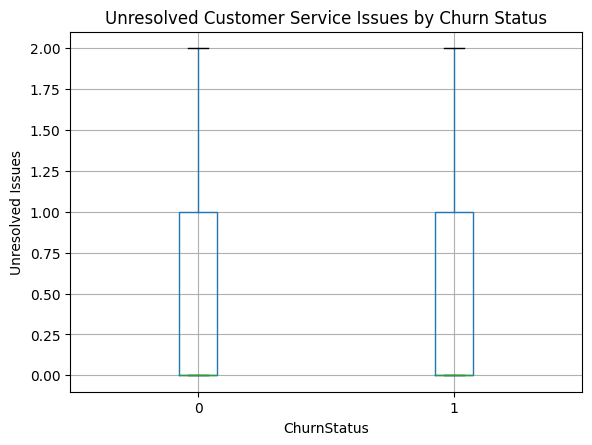

In [53]:
# visualise unresolved customer issues by churn status
plt.figure(figsize=(8,5))
df.boxplot(column="unresolved_count", by="ChurnStatus")
plt.title("Unresolved Customer Service Issues by Churn Status")
plt.suptitle("")
plt.ylabel("Unresolved Issues")
plt.show()


### Next EDA dimension: Transaction behaviour

In [54]:
# aggregate transaction per customer
txn_agg = (
    transactions
    .groupby("CustomerID")
    .agg(
        transaction_count=("TransactionID", "count"),
        total_spent=("AmountSpent", "sum"),
        avg_spent=("AmountSpent", "mean")
    )
    .reset_index()
)


In [55]:
# merge into main dataframe
df = df.merge(txn_agg, on="CustomerID", how="left")


In [56]:
# fill missing columns
df[["transaction_count", "total_spent", "avg_spent"]] = df[
    ["transaction_count", "total_spent", "avg_spent"]
].fillna(0)


In [57]:
# churn vs transaction behaviour
df.groupby("ChurnStatus")[["transaction_count", "total_spent", "avg_spent"]].mean()


,transaction_count,total_spent,avg_spent
ChurnStatus,,,
0,5.065327,1266.580038,247.006812
1,5.009804,1269.006078,255.828867


<Figure size 800x500 with 0 Axes>

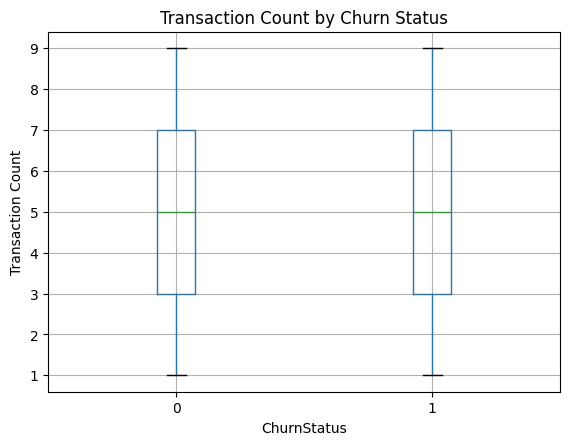

In [58]:
# visualise transaction frequency by churn status
plt.figure(figsize=(8,5))
df.boxplot(column="transaction_count", by="ChurnStatus")
plt.title("Transaction Count by Churn Status")
plt.suptitle("")
plt.ylabel("Transaction Count")
plt.show()


## Data Cleaning & Preparation

### Create a clean working dataframe

In [59]:
model_df = df[
    [
        "CustomerID",
        "ChurnStatus",
        "Age",
        "Gender",
        "MaritalStatus",
        "IncomeLevel",
        "LoginFrequency",
        "ServiceUsage",
        "total_interactions",
        "unresolved_count",
        "transaction_count",
        "avg_spent",
        "total_spent",
    ]
].copy()


### Check missing values

In [60]:
model_df.isna().sum()

CustomerID            0
ChurnStatus           0
Age                   0
Gender                0
MaritalStatus         0
IncomeLevel           0
LoginFrequency        0
ServiceUsage          0
total_interactions    0
unresolved_count      0
transaction_count     0
avg_spent             0
total_spent           0
dtype: int64

### Handle missing values

In [61]:
# Numeric columns
num_cols = [
    "LoginFrequency",
    "total_interactions",
    "unresolved_count",
    "transaction_count",
    "avg_spent",
    "total_spent",
]

model_df[num_cols] = model_df[num_cols].fillna(0)

# Categorical columns
cat_cols = ["Gender", "MaritalStatus", "IncomeLevel", "ServiceUsage"]
model_df[cat_cols] = model_df[cat_cols].fillna("Unknown")


### Outlier check

In [62]:
model_df[["LoginFrequency", "transaction_count", "avg_spent"]].describe()


,LoginFrequency,transaction_count,avg_spent
count,1000.000000,1000.000000,1000.000000
mean,25.912000,5.054000,248.806511
std,14.055953,2.603433,79.372766
min,1.000000,1.000000,9.800000
25%,13.750000,3.000000,203.734167
50%,27.000000,5.000000,250.121458
75%,38.000000,7.000000,295.023854
max,49.000000,9.000000,496.990000


### Encode categorical variables

In [63]:
model_df_encoded = pd.get_dummies(
    model_df,
    columns=["Gender", "MaritalStatus", "IncomeLevel", "ServiceUsage"],
    drop_first=True
)


### Final checks

In [64]:
model_df_encoded.shape
model_df_encoded.head()


,CustomerID,ChurnStatus,Age,LoginFrequency,total_interactions,unresolved_count,transaction_count,avg_spent,total_spent,Gender_M,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,IncomeLevel_Low,IncomeLevel_Medium,ServiceUsage_Online Banking,ServiceUsage_Website
0,1,0,62,34,1.0,0.0,1,416.50000,416.50,True,False,True,False,True,False,False,False
1,2,1,65,5,1.0,0.0,7,221.06000,1547.42,True,True,False,False,True,False,False,True
2,3,0,18,3,1.0,0.0,6,283.83000,1702.98,True,False,True,False,True,False,False,True
3,4,0,21,2,2.0,1.0,5,183.45800,917.29,True,False,False,True,True,False,False,True
4,5,0,21,41,0.0,0.0,8,250.18625,2001.49,True,False,False,False,False,True,False,True


In [65]:
[name for name in globals().keys() if name in ["df_model_ready", "model_df_encoded", "model_df", "df_encoded"]]


['model_df', 'model_df_encoded']

### Define features (X) and target (y)

In [66]:
# Use the encoded, modelling-ready dataset
data = model_df_encoded.copy()

# Target variable
y = data["ChurnStatus"].astype(int)

# Feature matrix
X = data.drop(columns=["ChurnStatus"], errors="ignore")

# Drop ID column if still present
X = X.drop(columns=["CustomerID"], errors="ignore")

print("X shape:", X.shape)
print("\nChurn distribution:")
print(y.value_counts())
print("\nChurn rate:")
print(y.value_counts(normalize=True))


X shape: (1000, 15)

Churn distribution:
ChurnStatus
0    796
1    204
Name: count, dtype: int64

Churn rate:
ChurnStatus
0    0.796
1    0.204
Name: proportion, dtype: float64


### Train-test split

In [71]:
import sys
!{sys.executable} -m pip install -U pip scikit-learn


  Using cached scikit_learn-1.8.0-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (11 kB)
  Using cached scipy-1.17.0-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.8.0-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (8.9 MB)
Using cached joblib-1.5.3-py3-none-any.whl (309 kB)
Using cached scipy-1.17.0-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (35.0 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]


In [72]:
import sklearn
sklearn.__version__


'1.8.0'

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train churn rate:", round(y_train.mean(), 3))
print("Test churn rate:", round(y_test.mean(), 3))


Train churn rate: 0.204
Test churn rate: 0.205


## Build and validate the model

### Create the logistic regression pipeline

In [74]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

log_reg = Pipeline(steps=[
    ("scaler", StandardScaler(with_mean=False)),  # safe with one-hot encoded features
    ("model", LogisticRegression(
        max_iter=2000,
        class_weight="balanced",
        random_state=42
    ))
])

log_reg


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",False
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not w

### Cross validation

In [75]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_auc = cross_val_score(log_reg, X_train, y_train, cv=cv, scoring="roc_auc")

print("CV ROC-AUC scores:", np.round(cv_auc, 3))
print("Mean CV ROC-AUC:", round(cv_auc.mean(), 3))


CV ROC-AUC scores: [0.585 0.514 0.459 0.569 0.475]
Mean CV ROC-AUC: 0.52


### Train Logistic Regression on full training data

In [76]:
log_reg.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",False
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not w

### Evaluate on the test set

Test ROC–AUC: 0.477

Classification Report:

              precision    recall  f1-score   support

           0      0.790     0.497     0.610       159
           1      0.200     0.488     0.284        41

    accuracy                          0.495       200
   macro avg      0.495     0.492     0.447       200
weighted avg      0.669     0.495     0.543       200



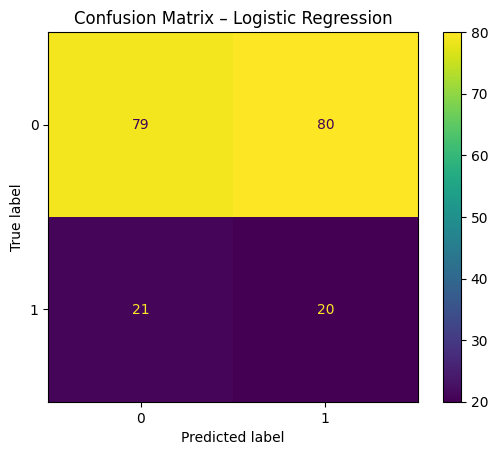

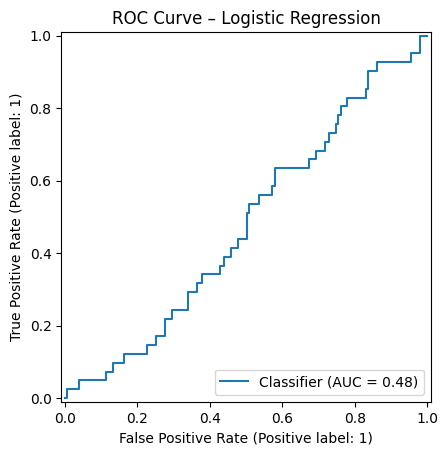

In [77]:
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    roc_auc_score,
    RocCurveDisplay
)
import matplotlib.pyplot as plt

# Predictions
y_proba = log_reg.predict_proba(X_test)[:, 1]
y_pred = log_reg.predict(X_test)

# ROC–AUC
print("Test ROC–AUC:", round(roc_auc_score(y_test, y_proba), 3))

# Classification metrics
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, digits=3))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix – Logistic Regression")
plt.show()

# ROC Curve
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve – Logistic Regression")
plt.show()


## Train a Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=8,
    min_samples_leaf=20,
    class_weight="balanced",
    random_state=42
)

rf_cv_auc = cross_val_score(
    rf,
    X_train,
    y_train,
    cv=cv,
    scoring="roc_auc"
)

print("RF CV ROC-AUC scores:", rf_cv_auc.round(3))
print("RF Mean CV ROC-AUC:", round(rf_cv_auc.mean(), 3))


RF CV ROC-AUC scores: [0.658 0.499 0.58  0.556 0.529]
RF Mean CV ROC-AUC: 0.564


### Train RF on full training set + evaluate on test set

In [79]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    RocCurveDisplay
)

# Train RF on training data
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Metrics
print("Random Forest Test ROC-AUC:", round(roc_auc_score(y_test, y_proba_rf), 3))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf


Random Forest Test ROC-AUC: 0.516

Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       159
           1       0.16      0.20      0.18        41

    accuracy                           0.62       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.65      0.62      0.64       200



array([[117,  42],
       [ 33,   8]])

### Extract feature importance

In [80]:



feature_importance = pd.Series(
    rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

feature_importance.head(10)


LoginFrequency        0.182131
avg_spent             0.174154
total_spent           0.165265
Age                   0.134180
transaction_count     0.081374
total_interactions    0.063507
Gender_M              0.039237
IncomeLevel_Low       0.026958
unresolved_count      0.022316
IncomeLevel_Medium    0.020660
dtype: float64